In [6]:
data_dir = "/home/daneel/workspace/simulations"
simulation_dirs = sorted([d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))])
import os
from tqdm.notebook import tqdm
import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt

In [8]:
complexes = {}

for dir in tqdm(simulation_dirs):
    topol_file = [f for f in os.listdir(os.path.join(data_dir, dir)) if f.endswith('.tpr')][0]
    traj_file = [f for f in os.listdir(os.path.join(data_dir, dir)) if f.endswith('.xtc')][0]
    complexes[dir] = mda.Universe(os.path.join(data_dir, dir, topol_file),
                                  os.path.join(data_dir, dir, traj_file))

  0%|          | 0/12 [00:00<?, ?it/s]

  0%|          | 0/12 [00:00<?, ?it/s]

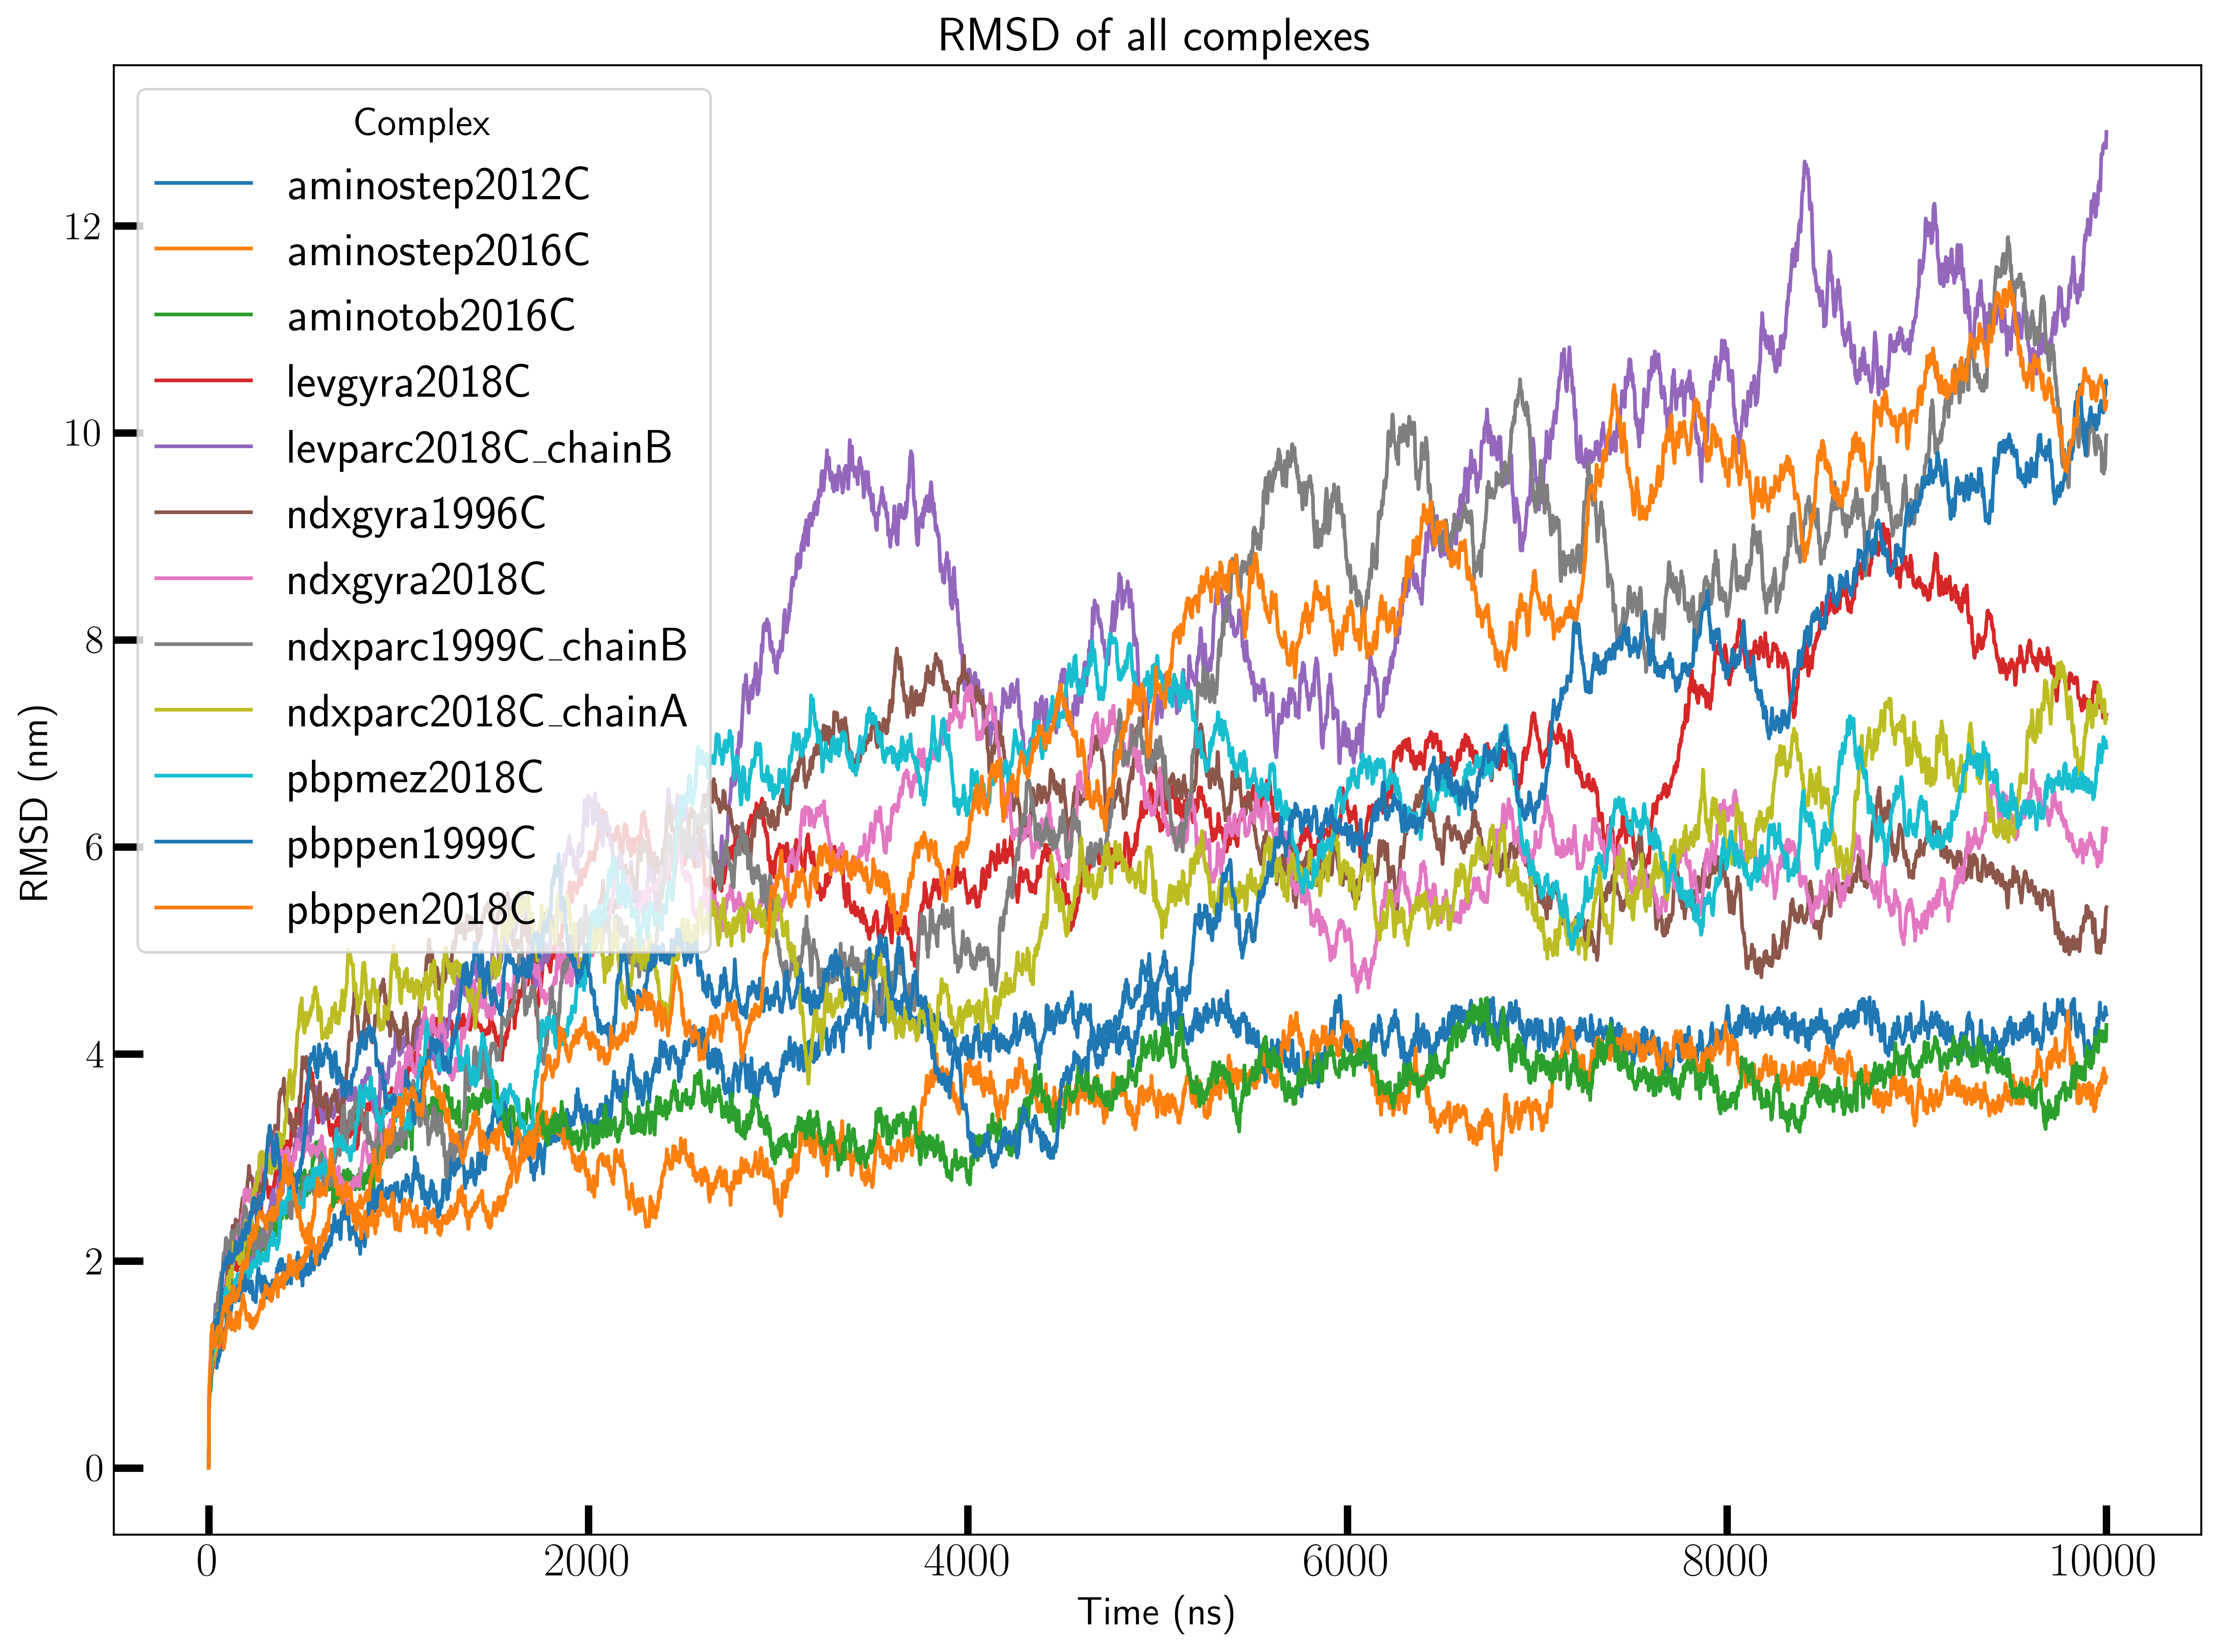

In [11]:
import pandas as pd
from MDAnalysis.analysis import rms
# Build the DataFrame directly by running the RMSD analysis for each complex
rmsd_df = None
for complexname, universe in tqdm(complexes.items()):
    R_local = rms.RMSD(universe, universe, select='backbone', ref_frame=0)
    R_local.run(verbose=False)
    times = R_local.results.rmsd[:, 1]
    rmsd = R_local.results.rmsd[:, 2]
    
    # For the first complex, initialize the DataFrame with the time column.
    if rmsd_df is None:
        rmsd_df = pd.DataFrame({'Time': times})
        
    # Add the RMSD values for the current complex to the DataFrame.
    rmsd_df[complexname] = rmsd

# Prepare and display the plot.
rmsd_df.set_index('Time', inplace=True)
rmsd_df.plot()
plt.xlabel('Time (ns)')
plt.ylabel('RMSD (nm)')
plt.title('RMSD of all complexes')
plt.legend(title='Complex')
plt.show()


NameError: name 'rmsd_df' is not defined

/usr/local/miniforge3/envs/biobb_wf_protein-complex_md_setup/lib/python3.12/site-packages/IPython/core/events.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  func(*args, **kwargs)
/usr/local/miniforge3/envs/biobb_wf_protein-complex_md_setup/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


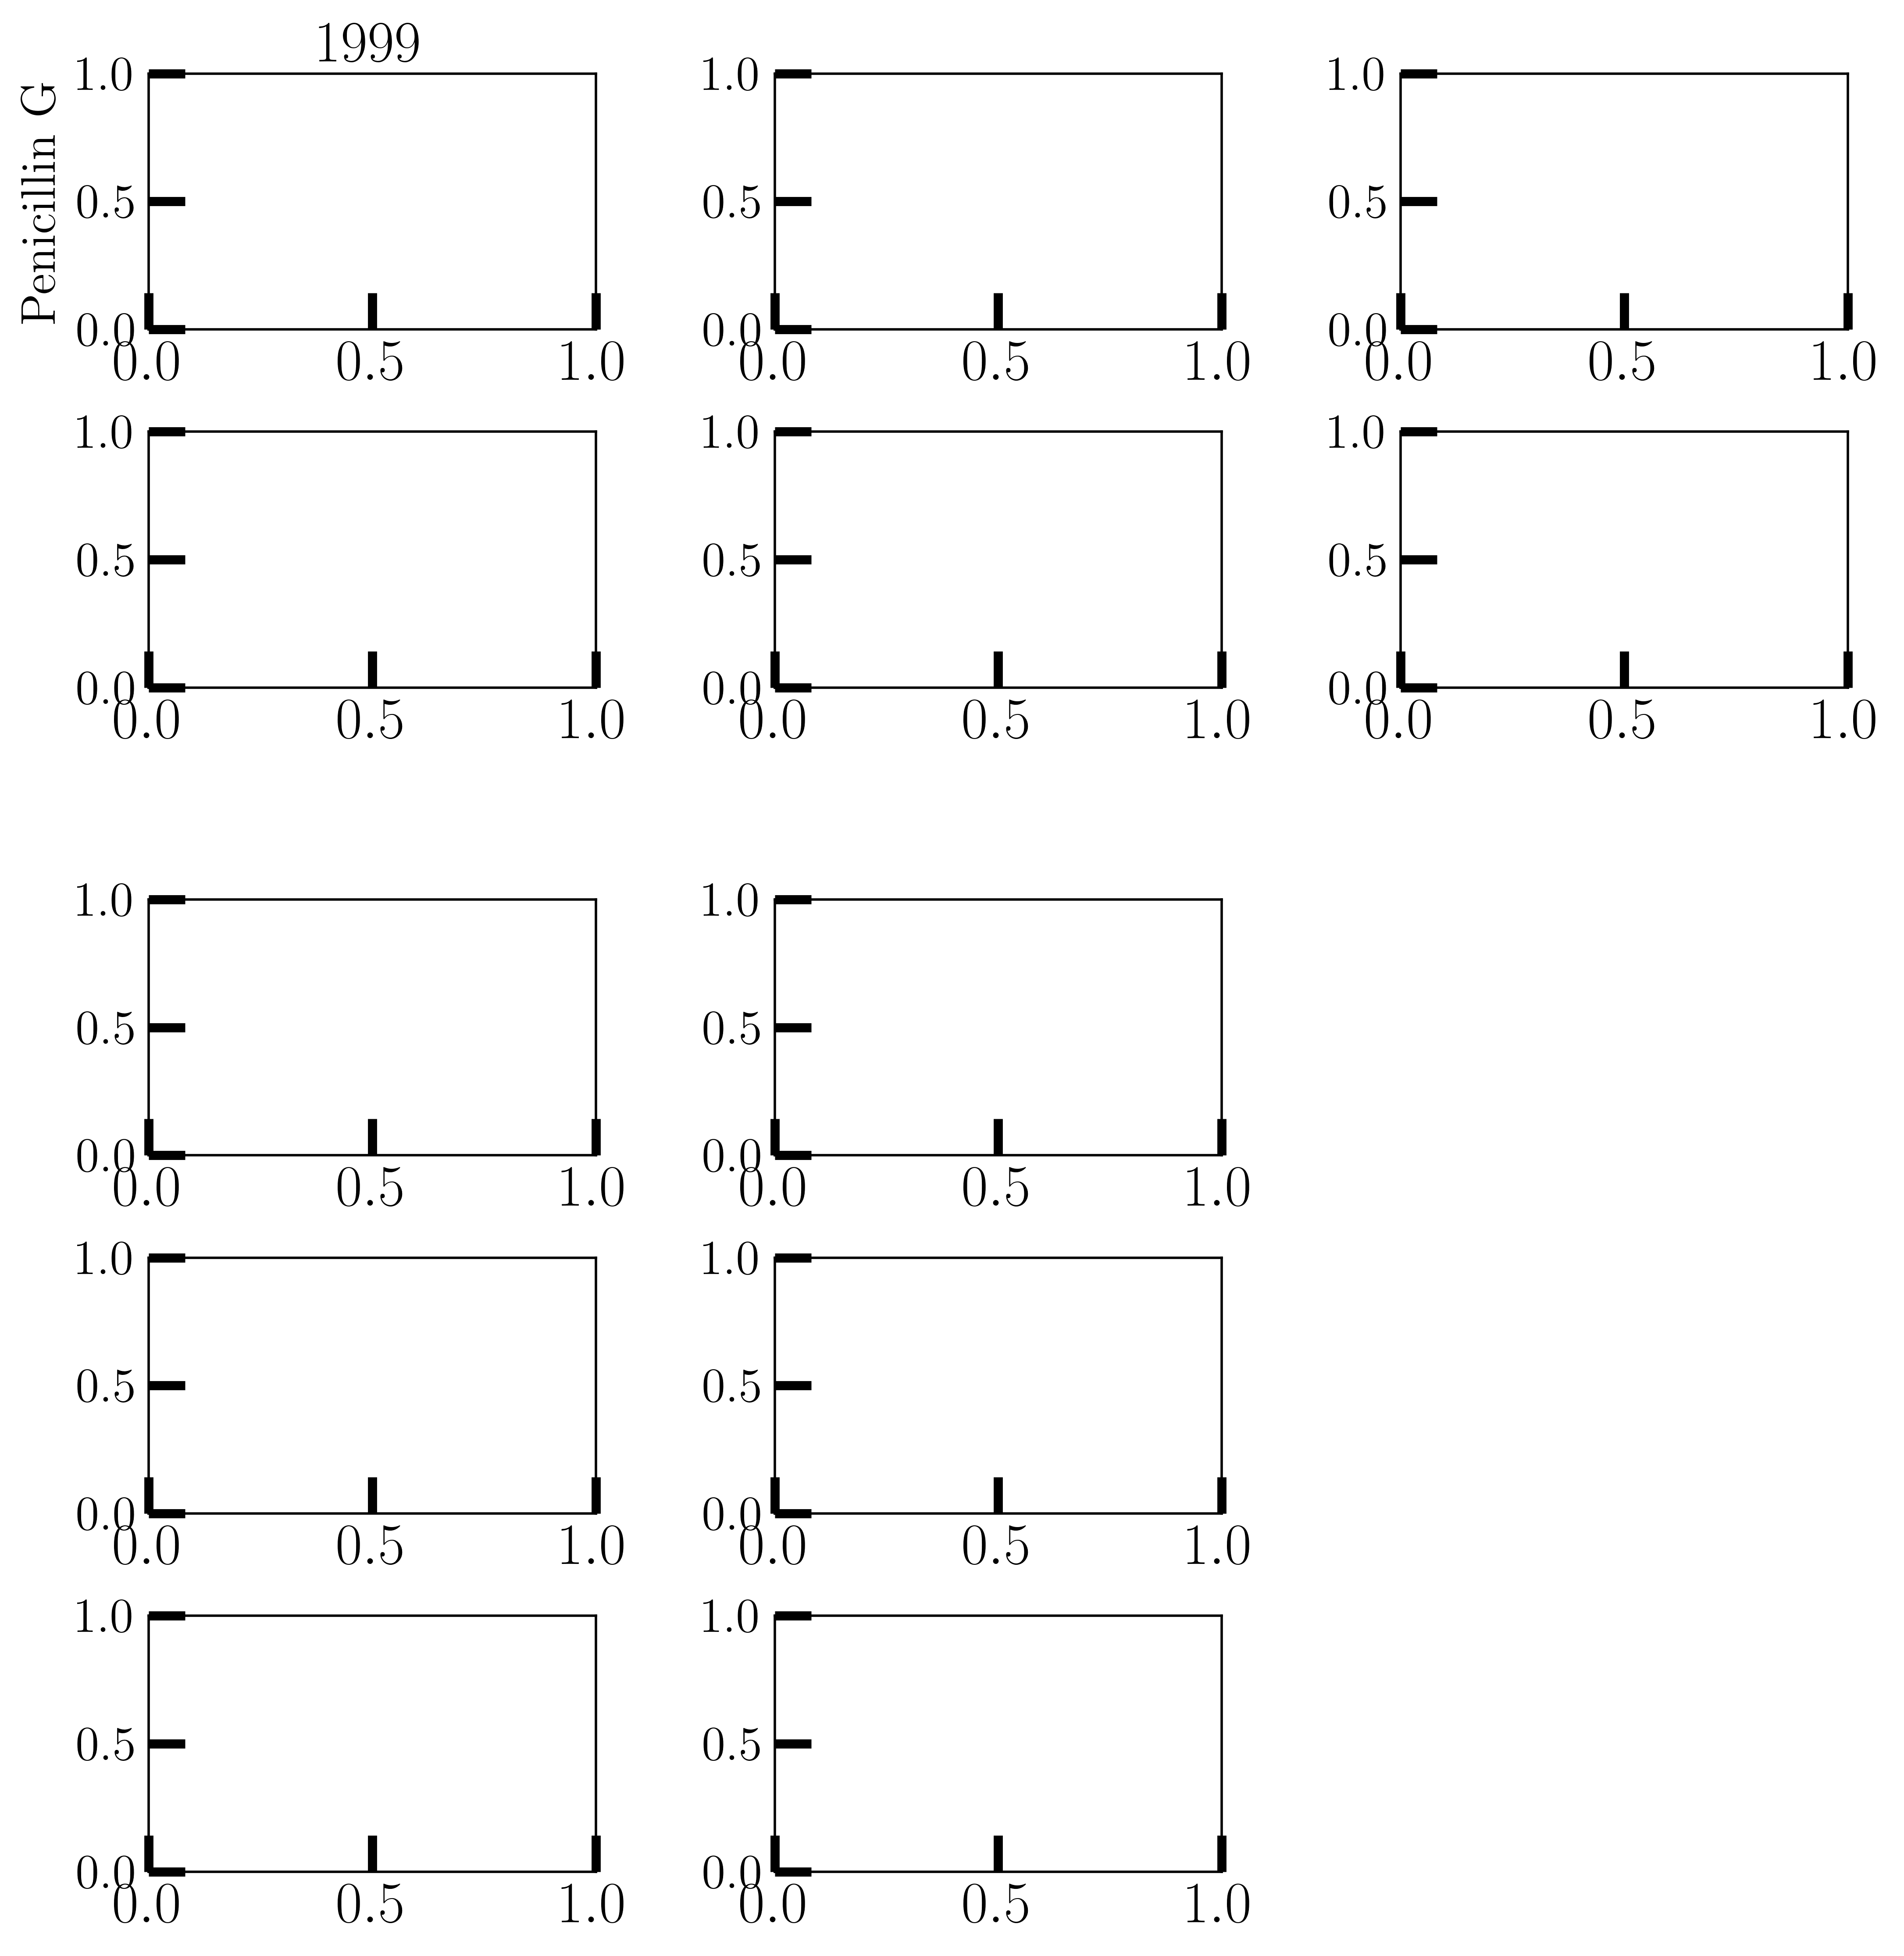

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

matplotlib.rcParams['axes.titlepad'] = 0
# Override the behavior of ax.axis('off') so that calls to turn off axes are ignored.
import matplotlib.axes as maxes
matplotlib.rcParams.update({'font.family': 'Calibri'})
_original_axis = maxes.Axes.axis

def new_axis(self, *args, **kwargs):
    if args and args[0] == 'off':
        return self  # Skip turning off the axes
    return _original_axis(self, *args, **kwargs)

maxes.Axes.axis = new_axis
# Create a figure of a suitable size
fig = plt.figure(figsize=(10, 10))

# Define a 5x3 grid with custom spacing between subplots
grid = plt.GridSpec(5, 3, wspace=0.4, hspace=0.4)


# Add subplots at specific grid positions
# For example, here we place one subplot per grid cell in a manner that mimics your layout.
ax1  = fig.add_subplot(grid[0, 0])
ax2  = fig.add_subplot(grid[0, 1])
ax3  = fig.add_subplot(grid[0, 2])
ax4  = fig.add_subplot(grid[1, 0])
ax5  = fig.add_subplot(grid[1, 1])
ax6  = fig.add_subplot(grid[1, 2])
ax7  = fig.add_subplot(grid[2, 0])
ax8  = fig.add_subplot(grid[2, 1])
ax9 = fig.add_subplot(grid[3, 0])
ax10 = fig.add_subplot(grid[3, 1])
ax11 = fig.add_subplot(grid[4, 0])
ax12 = fig.add_subplot(grid[4, 1])
offset = 0.05  # adjust the offset as needed

        

for a in fig.get_axes()[6:]:
    pos = a.get_position()
    a.set_position([pos.x0, pos.y0 - offset, pos.width, pos.height])

# Set titles on each subplot to mimic the annotative labels (for example, years)
ax1.set_title('1999')
ax1.set_ylabel('Penicillin G')
c = "pbppen1999C"
ax1.plot(rmsd_df.index, rmsd_df[c], label="RMSD", color='blue')
ax1.legend(title=c, loc='upper left')

ax2.set_title('2015')


ax3.set_title('2018')
c = "pbppen2018C"
ax3.plot(rmsd_df.index, rmsd_df[c], label="RMSD", color='blue')
ax3.legend(title=c, loc='lower right')

c = "pbpmez2018C"
ax6.plot(rmsd_df.index, rmsd_df[c], label="RMSD", color='blue')
ax6.legend(title=c, loc='lower right')

ax7.set_title('2012')
ax8.set_title('2016')


ax4.set_ylabel('Mezlocilin')
ax7.set_ylabel('Streptomycin')
ax9.set_ylabel('Neomycin')
ax11.set_ylabel('Tobramycin')


# Optionally, turn off the axis for clarity 
for ax in fig.get_axes():
    ax.axis('off')
    tick_label_sizes = [label.get_fontsize() for label in ax.get_xticklabels()]
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontsize(label.get_fontsize() - 6)


# Set an overall title for the whole figure
#fig.suptitle('B-Lactam Groups with PBP2 and Aminoglycoside Group Interactions', fontsize=16)




# Display the plot
plt.show()
